In [1]:
from tensorflow.keras.datasets import imdb

2024-04-22 18:05:35.744033: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 18:05:35.845830: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-22 18:05:36.346415: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-22 18:05:37.337982: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words = 10000)

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimensions = 10000):
  results = np.zeros((len(sequences), dimensions))
  for i,sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [5]:
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_label).astype('float32')


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
model = Sequential()
model.add(Dense(16, input_shape=(10000, ), activation = "relu"))
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

/home/sudharshan/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss = 'mse', metrics = ['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 20, verbose = 1, batch_size = 512)

Epoch 1/20


2024-04-22 18:06:16.199576: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 700000000 exceeds 10% of free system memory.


34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6671 - loss: 0.2147

2024-04-22 18:06:18.180867: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 300000000 exceeds 10% of free system memory.


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6727 - loss: 0.2127 - val_accuracy: 0.8784 - val_loss: 0.1132
Epoch 2/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9132 - loss: 0.0884 - val_accuracy: 0.8903 - val_loss: 0.0855
Epoch 3/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9381 - loss: 0.0568 - val_accuracy: 0.8920 - val_loss: 0.0816
Epoch 4/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9621 - loss: 0.0404 - val_accuracy: 0.8913 - val_loss: 0.0817
Epoch 5/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9730 - loss: 0.0310 - val_accuracy: 0.8877 - val_loss: 0.0835
Epoch 6/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9793 - loss: 0.0251 - val_accuracy: 0.8836 - val_loss: 0.0861
Epoch 7/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9849 - loss: 0.0197 - val_accuracy: 0.8805 - val_loss: 0.0892
Epoch 8/20
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9875 - loss: 0.0162 - val_accuracy: 0.8793 - val_loss: 0.

In [11]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

2024-04-22 18:06:41.455576: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


Test Accuracy: 85.60%


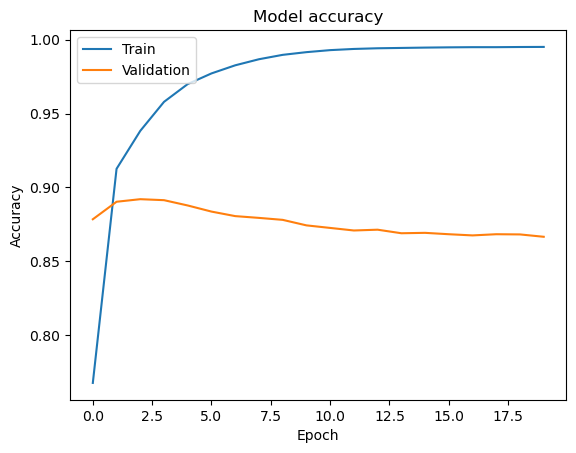

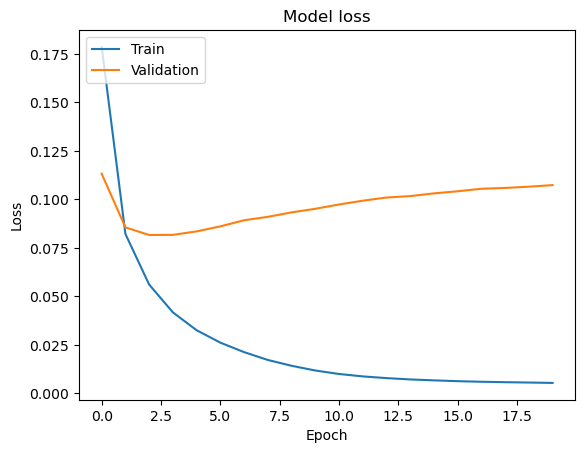

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()